In [23]:
%matplotlib inline 
#widget
import sys 
import xarray as xr
import numpy as np
import os 
import warnings
import yaml
from random import randint
import math
from datetime import datetime, timedelta
import netCDF4 as nc

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *

In [24]:
jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
def finder(lati,loni):
    j = [jjii.jj.sel(lats=lati, lons=loni, method='nearest').item()][0]
    i = [jjii.ii.sel(lats=lati, lons=loni, method='nearest').item()][0]
    return j,i

In [25]:
path_runs = '/home/jvalenti/MOAD/results/Graham/'
config = ['/home/jvalenti/scratch/OParcels_runs/Parcels_outfall/outfall_runs.yaml']
restart = 0
paths = path(0)
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

path_NEMO = make_prefix(datetime(2019, 1, 1),paths['NEMO'])
jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
def finder(lati,loni):
    j = [jjii.jj.sel(lats=lati, lons=loni, method='nearest').item()][0]
    i = [jjii.ii.sel(lats=lati, lons=loni, method='nearest').item()][0]
    return j,i

In [26]:
ds = xr.open_dataset('/home/jvalenti/MOAD/results/Graham/Run_Agosto20190801_.nc', decode_times=False)

In [27]:
coords = xr.open_dataset('/home/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')

Text(0.5, 1.0, 'Salish Sea subregions')

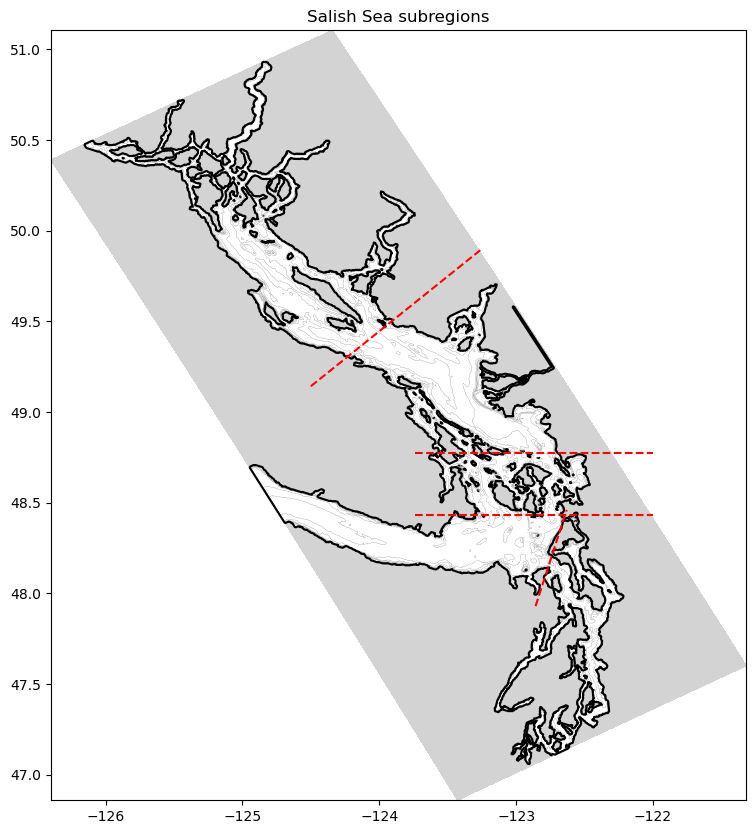

In [28]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense

fig, ax = plt.subplots(1,1,figsize=(10, 10))

ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
Xline = np.linspace(-124.5,-122,100)
yline0 = (7/3)*Xline+334.6
yline1 = (20/33)*Xline+124.597
yline2 = np.zeros_like(Xline)+48.43
yline3 = np.zeros_like(Xline)+48.774
plt.plot(Xline[65:75],yline0[65:75],'r--')
plt.plot(Xline[:50],yline1[:50],'r--')
plt.plot(Xline[30:],yline2[30:],'r--')
plt.plot(Xline[30:],yline3[30:],'r--')

plt.title('Salish Sea subregions')

In [29]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

/tmp/ipykernel_11260/2875790249.py:24: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  aa.cmap.set_over('orange')
/tmp/ipykernel_11260/2875790249.py:25: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  aa.cmap.set_under('white')


Text(0.5, 1.0, 'Salish Sea subregions')

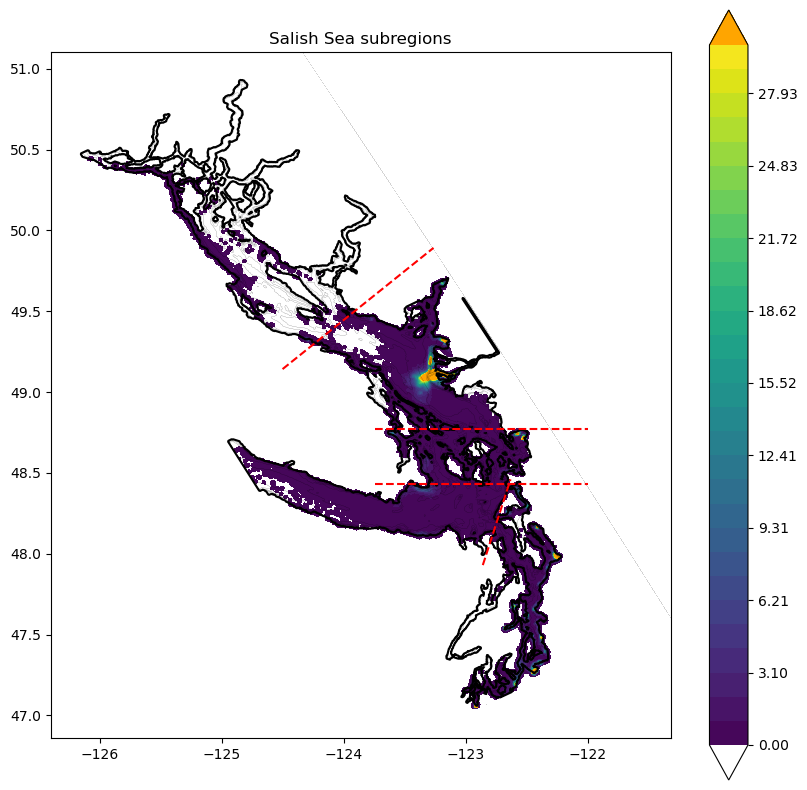

In [30]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense
levels = np.linspace(1e-5,30,30)
fig, ax = plt.subplots(1,1,figsize=(10, 10))
conc = np.load(path_runs+'Run_Enero20190101_.nc.npy')
conc2 = np.load(path_runs+'Run_Febrero20190201_.nc.npy')
conc3 = np.load(path_runs+'Run_Marzo20190301_.nc.npy')
conc_winter = (conc + conc2 + conc3)/3

conc = np.load(path_runs+'Run_Junio20190601_.nc.npy')
conc2 = np.load(path_runs+'Run_Julio20190701_.nc.npy')
conc3 = np.load(path_runs+'Run_Agosto20190801_.nc.npy')
conc_summer = (conc + conc2 + conc3)/3

#conc_summer = np.load(path_runs+'Runs_alpha0120190101_.npy')
Ni = 3

ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
aa = ax.contourf(coords.nav_lon[::Ni,::Ni], coords.nav_lat[::Ni,::Ni],np.sum(conc_summer[:15,:,:],axis=0),levels=levels,extend='both')
plt.colorbar(aa)
aa.cmap.set_over('orange')
aa.cmap.set_under('white')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
Xline = np.linspace(-124.5,-122,100)
yline0 = (7/3)*Xline+334.6
yline1 = (20/33)*Xline+124.597
yline2 = np.zeros_like(Xline)+48.43
yline3 = np.zeros_like(Xline)+48.774
plt.plot(Xline[65:75],yline0[65:75],'r--')
plt.plot(Xline[:50],yline1[:50],'r--')
plt.plot(Xline[30:],yline2[30:],'r--')
plt.plot(Xline[30:],yline3[30:],'r--')
plt.title('Salish Sea subregions')

In [31]:
sys.path.append('/home/jvalenti/MOAD/tools')

from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools)

In [32]:
conc01 = np.load(path_runs+'Runs_alpha0120190101_.npy')

In [33]:
def artificial_hr(var,Ni,mask):    
    new_conc = np.zeros_like(mask.tmask[0,...],dtype='f')
    for i in range(new_conc.shape[1]):
        for j in range(new_conc.shape[2]):
            new_conc[:,i,j]=var[:,int(i/Ni),int(j/Ni)]
    return new_conc

new_conc = artificial_hr(conc_winter,3,mask)

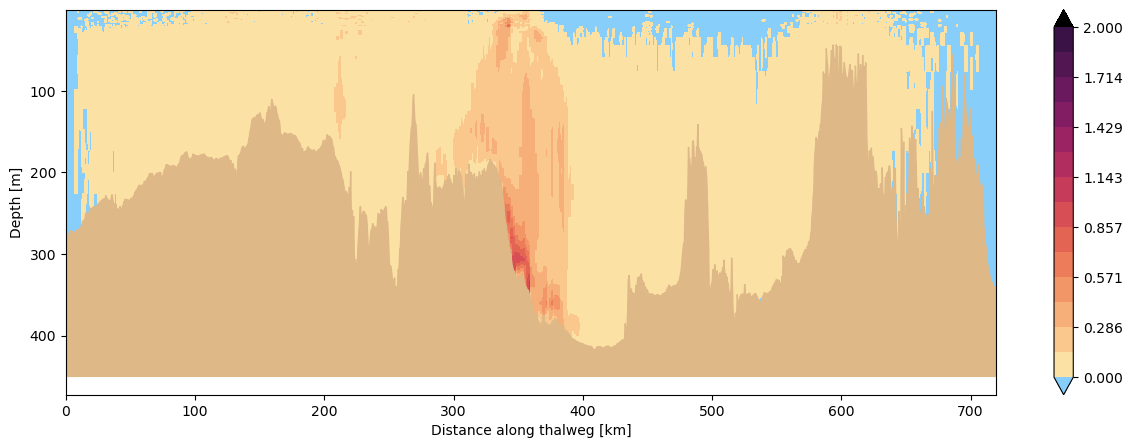

In [34]:
#open bathy file and meshmask
fmesh = nc.Dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')
fbathy=nc.Dataset('/home/jvalenti/MOAD/grid/bathymetry_201702.nc')
levels = np.linspace(0, 2, 15)
fig,ax = plt.subplots(1,1,figsize=(15,5))
vis.contour_thalweg(ax,new_conc,fbathy,fmesh,clevels=levels,cmap=cmocean.cm.matter)

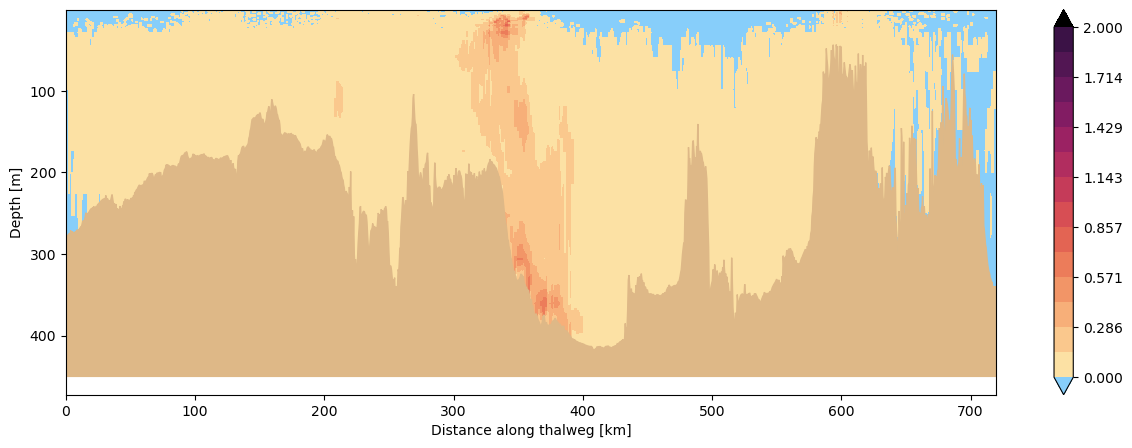

In [35]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
vis.contour_thalweg(ax,artificial_hr(conc_summer,3,mask),fbathy,fmesh,clevels=levels,cmap=cmocean.cm.matter)

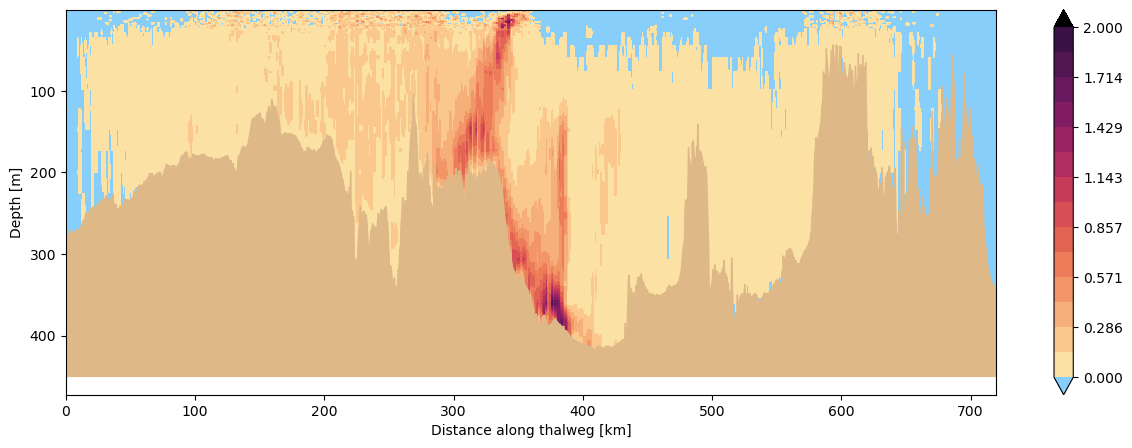

In [36]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
vis.contour_thalweg(ax,artificial_hr(conc01,3,mask),fbathy,fmesh,clevels=levels,cmap=cmocean.cm.matter)

In [37]:
conc1 = np.load(path_runs+'alpha_1_jan.npy')

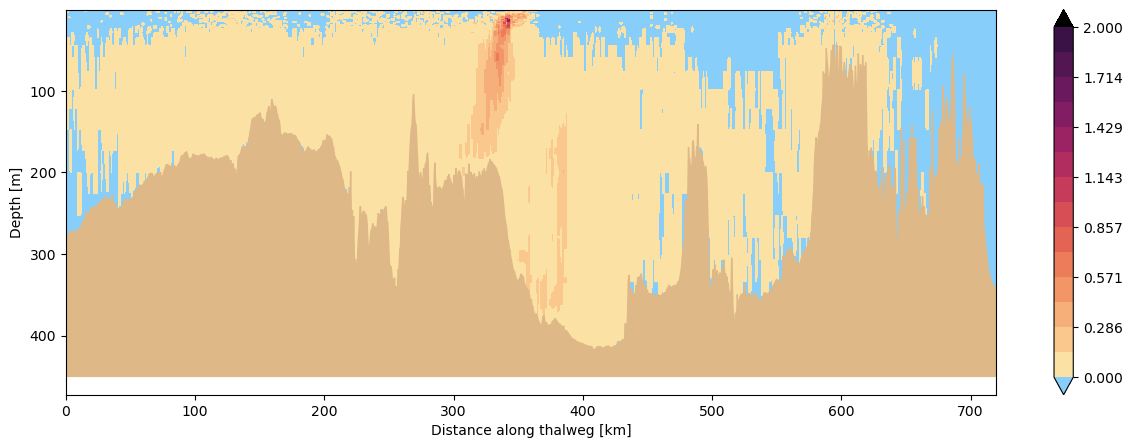

In [38]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
vis.contour_thalweg(ax,artificial_hr(conc1/2,3,mask),fbathy,fmesh,clevels=levels,cmap=cmocean.cm.matter)

In [39]:
ii,jj = finder(49.10891800952296, -123.25364922146802)

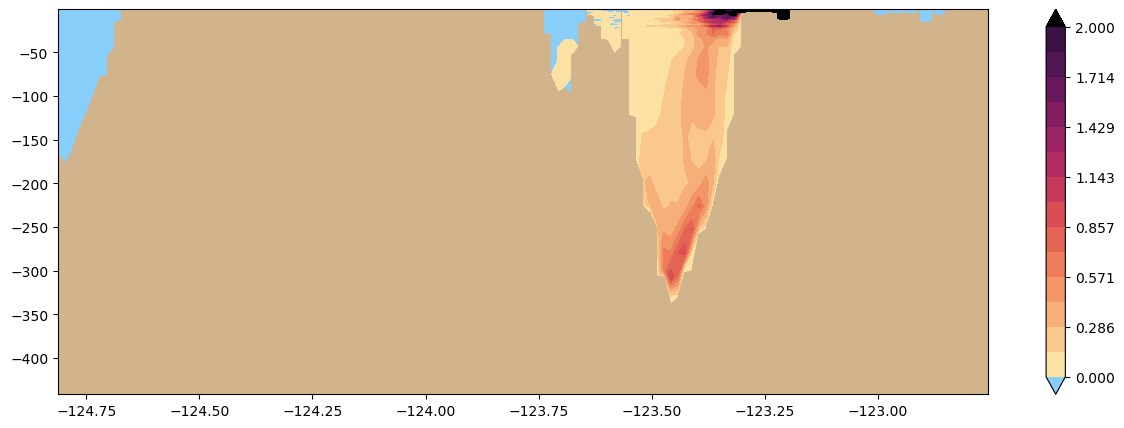

In [40]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
levels = np.linspace(0, 2, 15)

Lon,Depth = np.meshgrid(coords.nav_lon[ii,::Ni],mask.gdept_0[0,:,ii,0])
ac = plt.contourf(Lon,-mask.gdept_0[0,:,ii,::Ni],conc_winter[:,int(ii/3),:],levels=levels,cmap=cmocean.cm.matter,extend='both')
ax.contourf(Lon,-mask.gdept_0[0,:,ii,::Ni], mask.tmask[0,:,ii,::Ni], levels=[-0.01, 0.01], colors='tan')
ac.cmap.set_over('black')
ac.cmap.set_under('lightskyblue')
#plt.xlim([-124,-123])
plt.colorbar(ac)

In [41]:
# ii,jj = finder(47.87165772740129, -122.46930667118855)

In [42]:
# fig,ax = plt.subplots(1,1,figsize=(15,5))
# levels = np.linspace(0, 2, 15)

# Lat,Depth = np.meshgrid(coords.nav_lat[::Ni,jj],mask.gdept_0[0,:,0,jj])
# ac = plt.contourf(Lat,-mask.gdept_0[0,:,::Ni,jj],conc_winter[:,:,int(jj/3)],levels=levels,cmap=cmocean.cm.matter,extend='both')
# ax.contourf(Lat,-mask.gdept_0[0,:,::Ni,jj], mask.tmask[0,:,::Ni,jj], levels=[-0.01, 0.01], colors='tan')
# ac.cmap.set_over('black')
# ac.cmap.set_under('lightskyblue')
# #plt.xlim([-124,-123])
# plt.colorbar(ac)

In [43]:
grid = nc.Dataset('/data/eolson/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc','r')
bathy = grid.variables['Bathymetry'][:,:]
thalweg = np.loadtxt('puget_thalweg.txt', delimiter=' ', dtype=int)

FileNotFoundError: [Errno 2] No such file or directory: b'/data/eolson/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc'